<a href="https://colab.research.google.com/github/BDASS84/My_First_Repo/blob/main/KNN_Apple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UNSUPERVISED LEARNING - Clustering

### Wholesale customers dataset

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Load the dataset
data = pd.read_csv('Wholesale-customers-data.csv')

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Drop non-numeric columns (assuming they are not useful for clustering)

data_numeric = data.drop(['Channel', 'Region'], axis=1)

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
# Standardize the data (important for K-Means)

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

# K-Means Algorithm

In [6]:
# Choose the number of clusters (K)

# We can use the Elbow Method to find an optimal K

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)


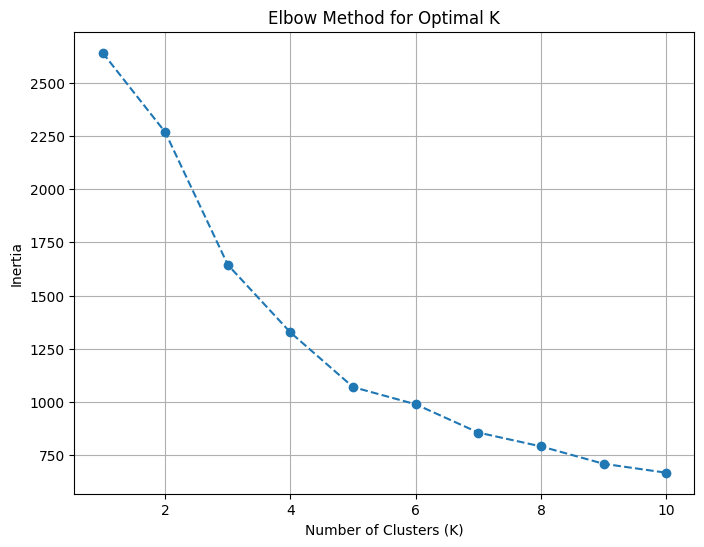

In [7]:
# Plot the Elbow Method

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.grid()
plt.show()

In [8]:
# Based on the Elbow Method, you can choose an appropriate K value.
# In this example, let's assume K=3 (but you can choose your own K).

In [9]:
# Perform K-Means clustering with K=3

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

KMeans(n_clusters=3, random_state=42)

In [10]:
# Add cluster labels to the original dataset

data['Cluster'] = kmeans.labels_

# Introduction to Hierarchical Clustering

In [11]:
# Perform Agglomerative Hierarchical Clustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clusters = agg_clustering.fit_predict(data_scaled)

In [12]:
# Add cluster labels to the original dataset

data['Agg_Cluster'] = agg_clusters

In [13]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster,Agg_Cluster
0,2,3,12669,9656,7561,214,2674,1338,0,2
1,2,3,7057,9810,9568,1762,3293,1776,0,2
2,2,3,6353,8808,7684,2405,3516,7844,0,2
3,1,3,13265,1196,4221,6404,507,1788,0,1
4,2,3,22615,5410,7198,3915,1777,5185,1,1


# Agglomerative Hierarchical Clustering

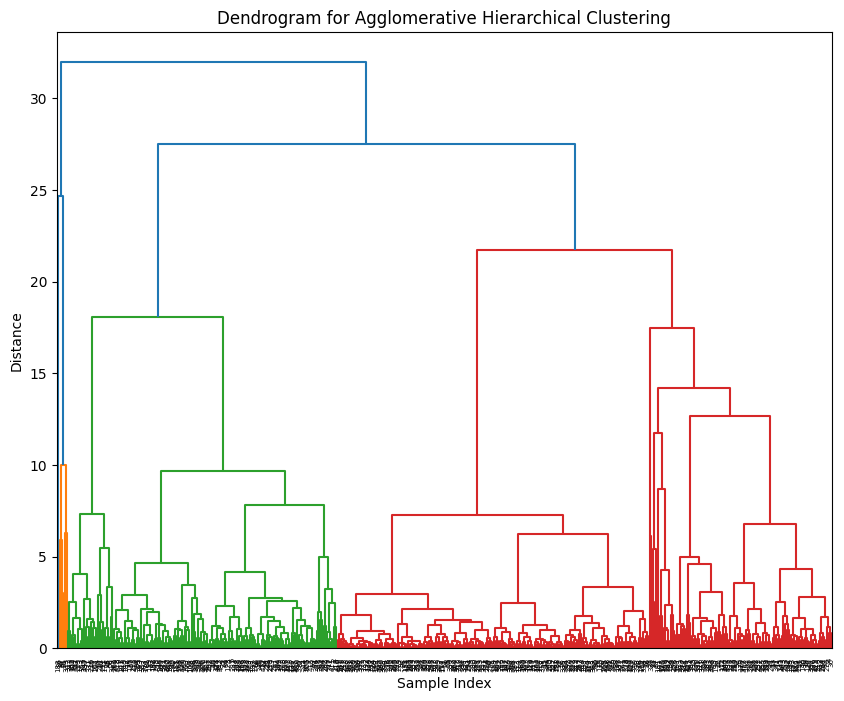

In [14]:
# Plot the Dendrogram for Agglomerative Hierarchical Clustering

linkage_matrix = linkage(data_scaled, method='ward')
plt.figure(figsize=(10, 8))
dendrogram(linkage_matrix)
plt.title('Dendrogram for Agglomerative Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [15]:
# You can now explore and analyze the clusters in the 'Cluster' and 'Agg_Cluster' columns of the dataset.
# Additionally, you can evaluate the quality of your clusters using silhouette score or other relevant metrics.

In [16]:
# Example: Silhouette Score for K-Means
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)
print(f'Silhouette Score (K-Means): {silhouette_avg}')


Silhouette Score (K-Means): 0.4582633767207058


In [17]:
# Example: Silhouette Score for Agglomerative Hierarchical Clustering
silhouette_avg_agg = silhouette_score(data_scaled, agg_clusters)
print(f'Silhouette Score (Agglomerative Hierarchical): {silhouette_avg_agg}')

Silhouette Score (Agglomerative Hierarchical): 0.2646091480214908
